# Simple MLP model
A simple MLP contains only one hidden layer. We supply a data matrix to the input to have the same input as for the transformers. So we first need to flatten the matrix into a vector that can be run through the net.

This notebook presents the results achieved using the multi-step forecasting model.

In [1]:
import sys
sys.path.append(r'D:\Uni_FJFI\NMS3\DP\project_I\System-Imbalance-Forecasting\models\transfromer_decoder_only')
import inference_helpers

import torch
from config import get_config

import numpy as np
from sklearn.metrics import mean_squared_error

In [ ]:
from importlib import reload
reload(inference_helpers)

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
cfg = get_config()

Using device: cpu


We present summary statistics on validation data. To measure error, it was used RMSE, MAE and R2 score. The error is computed for every prediction separately.

In [ ]:
best_metrics, best_models_inds, data_dict = inference_helpers.get_best_model(cfg, './loss/runXY_exact')
loss_validation, loss_cat, preds_gt = inference_helpers.validate_n_models(device, 'XY_exact', best_models_inds)

In [4]:
res = inference_helpers.compute_val_errors(preds_gt, 8)

Model	RMSE	MAE	R2
1	119.37	89.10	0.50
2	140.95	103.35	0.30
3	150.16	109.25	0.20
4	155.56	112.43	0.15
5	161.50	116.22	0.08
6	163.77	117.60	0.05
7	164.53	117.84	0.04
8	165.74	119.20	0.03


The visual results are shown in the following graphs. Plotted are the k best, worst and random predictions against the average RMSE over all prediction steps.

In [5]:
seq_data = inference_helpers.group_data(preds_gt)

rmse_data = np.empty(len(seq_data), dtype=np.float32)
for ind, dp in enumerate(seq_data):
    rmse_data[ind] = mean_squared_error(dp['true'], dp['pred'], squared=False)

# get k random, best and worst predictions
k = 3
min_loss_inds = np.argsort(rmse_data)[:k].tolist()
max_loss_inds = np.argsort(rmse_data)[-k:].tolist()
rand_inds = np.random.randint(0, len(rmse_data), size=k).tolist()

### Bad predictions

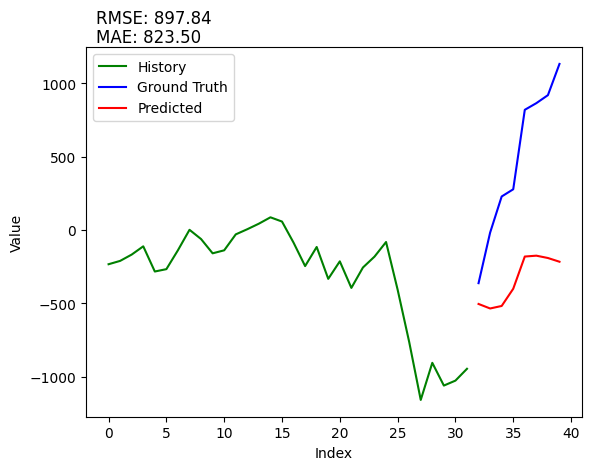

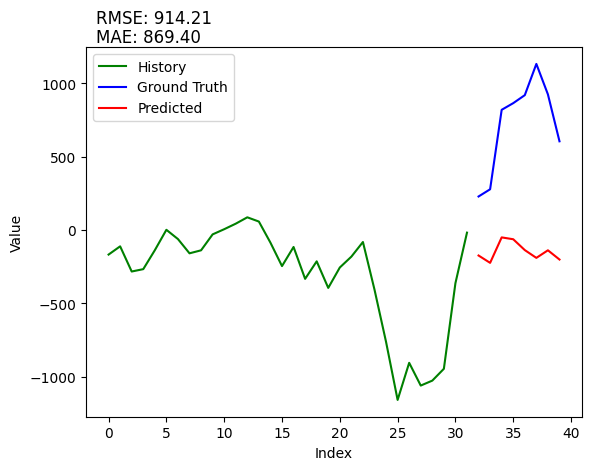

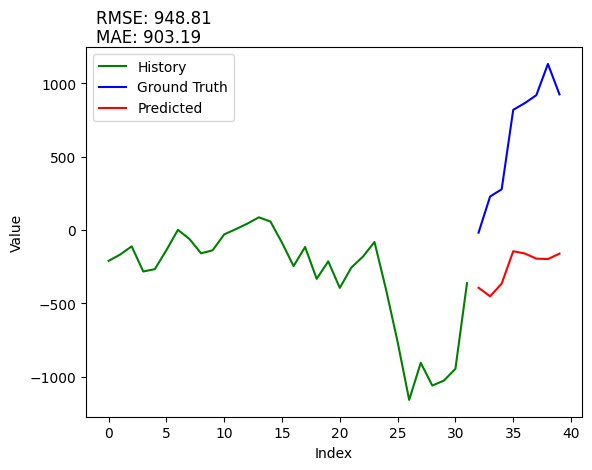

In [6]:
inference_helpers.plot_k_results(seq_data, max_loss_inds)

### Good predictions

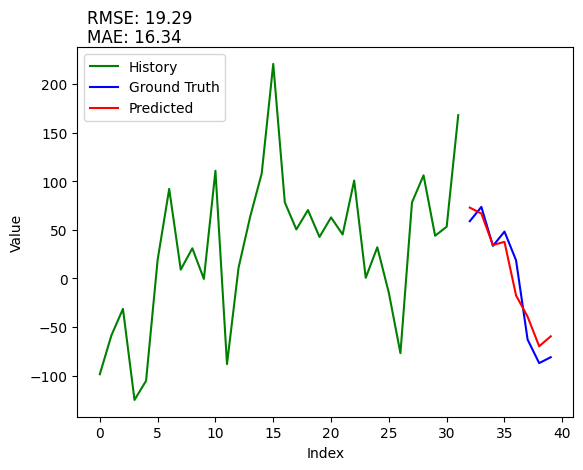

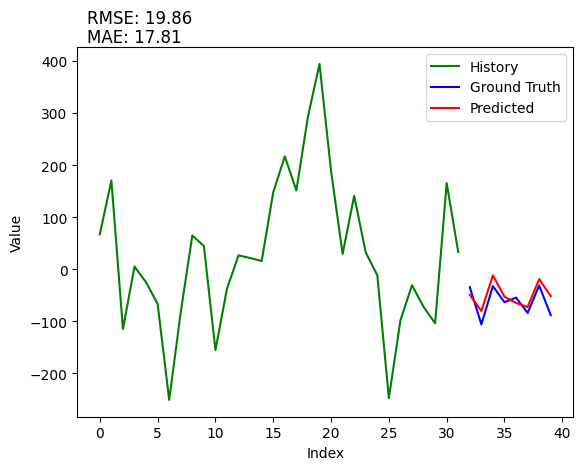

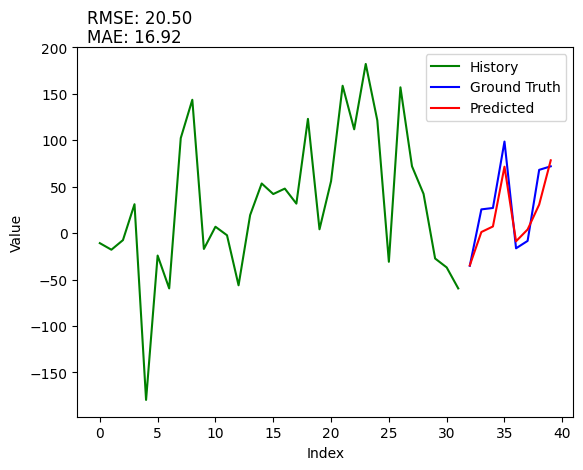

In [7]:
inference_helpers.plot_k_results(seq_data, min_loss_inds)

### Random predictions

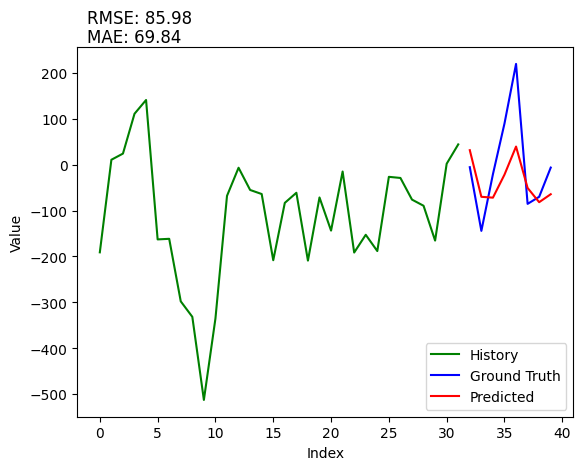

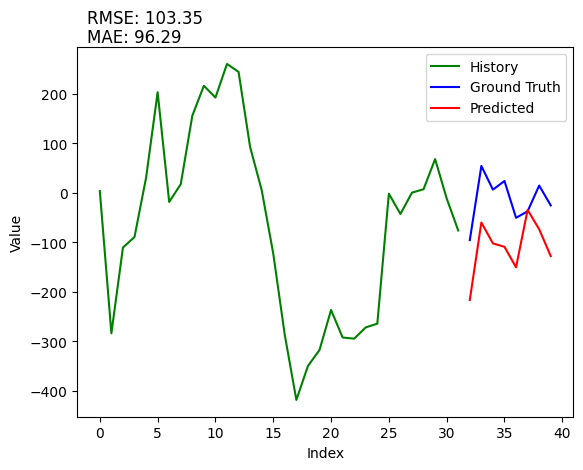

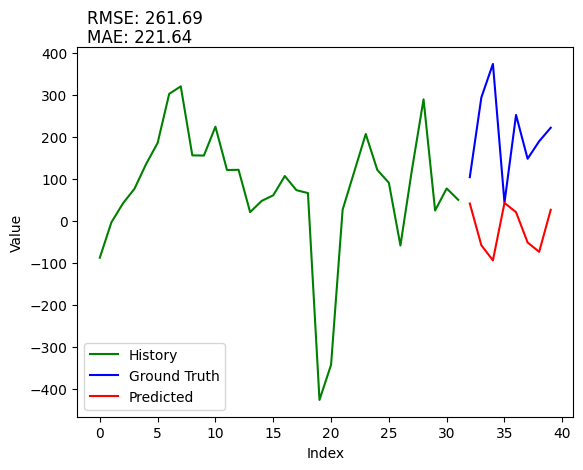

In [8]:
inference_helpers.plot_k_results(seq_data, rand_inds)